In [2]:
#### import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import itertools
import time
import statsmodels.formula.api as sm

train = pd.read_csv('ncaa_train.csv')
test = pd.read_csv('ncaa_test.csv')
alldata = pd.concat([train,test])
alldata['indx'] = [i for i in range(61)]
alldata = alldata.set_index(keys=['indx'])
alldata.iloc[:,1:22]

,GP,GS,MIN,PTS,FGM,FGA,FGP,Three_Pmade,Three_PA,Three_PP,...,FTA,FTP,OFF,DEF,TRB,AST,STL,BLK,TOV,PF
indx,,,,,,,,,,,,,,,,,,,,,
0,27,26,35.4,20.15,6.48,14.81,0.440,2.30,5.74,0.400,...,5.78,0.850,0.70,5.48,6.19,3.48,1.59,0.78,4.04,2.48
1,30,30,28.9,14.37,5.17,10.27,0.500,1.17,3.47,0.340,...,3.77,0.760,0.60,4.73,5.33,4.53,1.90,0.33,2.93,2.60
2,28,26,31.8,12.46,4.43,9.29,0.480,1.25,3.64,0.340,...,2.82,0.840,0.71,5.82,6.54,3.00,1.25,1.04,1.29,2.21
3,30,30,32.4,14.00,5.27,10.30,0.510,2.10,4.70,0.450,...,2.13,0.640,0.47,2.20,2.67,5.50,1.90,0.37,2.43,2.37
4,15,14,31.6,18.73,6.53,14.60,0.450,1.47,5.00,0.290,...,5.40,0.780,1.53,4.13,5.67,1.80,1.13,0.27,2.80,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,31,31,32.9,19.20,7.20,12.50,0.571,1.50,3.40,0.438,...,4.90,0.691,1.80,5.70,7.50,2.90,1.20,1.10,2.30,2.30
57,39,39,33.9,13.41,4.82,9.64,0.500,1.33,3.23,0.413,...,3.03,0.805,1.23,4.08,5.31,4.41,1.41,0.21,1.95,1.59
58,11,11,28.5,12.09,4.09,11.91,0.344,1.55,5.82,0.266,...,3.18,0.743,0.91,4.91,5.82,1.55,0.82,0.82,2.09,1.55


In [3]:
alldata

,Player,GP,GS,MIN,PTS,FGM,FGA,FGP,Three_Pmade,Three_PA,...,FTP,OFF,DEF,TRB,AST,STL,BLK,TOV,PF,NBA_PTS
indx,,,,,,,,,,,,,,,,,,,,,
0,Cade Cunningham,27,26,35.4,20.15,6.48,14.81,0.440,2.30,5.74,...,0.850,0.70,5.48,6.19,3.48,1.59,0.78,4.04,2.48,17.41
1,Jalen Suggs,30,30,28.9,14.37,5.17,10.27,0.500,1.17,3.47,...,0.760,0.60,4.73,5.33,4.53,1.90,0.33,2.93,2.60,11.75
2,Franz Wagner,28,26,31.8,12.46,4.43,9.29,0.480,1.25,3.64,...,0.840,0.71,5.82,6.54,3.00,1.25,1.04,1.29,2.21,15.15
3,Davion Mitchell,30,30,32.4,14.00,5.27,10.30,0.510,2.10,4.70,...,0.640,0.47,2.20,2.67,5.50,1.90,0.37,2.43,2.37,11.48
4,James Bouknight,15,14,31.6,18.73,6.53,14.60,0.450,1.47,5.00,...,0.780,1.53,4.13,5.67,1.80,1.13,0.27,2.80,1.87,4.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,David Roddy,31,31,32.9,19.20,7.20,12.50,0.571,1.50,3.40,...,0.691,1.80,5.70,7.50,2.90,1.20,1.10,2.30,2.30,6.25
57,Wendell Moore Jr.,39,39,33.9,13.41,4.82,9.64,0.500,1.33,3.23,...,0.805,1.23,4.08,5.31,4.41,1.41,0.21,1.95,1.59,1.50
58,Patrick Baldwin Jr.,11,11,28.5,12.09,4.09,11.91,0.344,1.55,5.82,...,0.743,0.91,4.91,5.82,1.55,0.82,0.82,2.09,1.55,5.67


In [4]:
y = np.log(alldata.NBA_PTS)
X = alldata.iloc[:,1:22]; 

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

alphas = 10**np.linspace(10,-2,200)*0.5

In [5]:
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)
    
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

15.811388300841896

Text(0, 0.5, 'Cross-validation error')

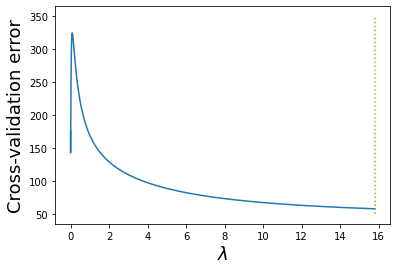

In [6]:
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[50,350],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [30]:
ridgz = pd.DataFrame(ridgecv.cv_values_.sum(axis=0),ridgecv.alphas)
ridgz

,0
15.811388,57.745337
15.009179,58.642568
14.247671,59.583770
13.524799,60.569960
12.838602,61.602074
...,...
0.000616,171.853320
0.000585,172.891416
0.000555,173.903704
0.000527,174.888614


In [ ]:
# cross-validation error @ optimal lambda = 57.745337